📊 Class Distribution:

     Count  Percentage
FM   51059       47.64
NM   41866       39.06
FiM  10898       10.17
AFM   3360        3.13


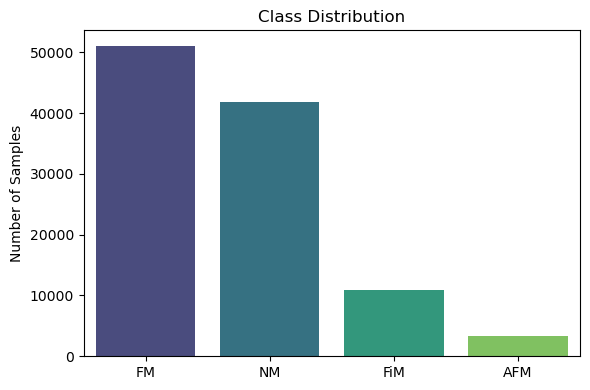

In [4]:
# Distribution of different classes in Materials with at least one magnetic element

import seaborn as sns
import matplotlib.pyplot as plt

# === Decode class labels ===
y_named = le.inverse_transform(y)

# === Count class occurrences ===
class_counts = pd.Series(y_named).value_counts()
class_percentages = class_counts / len(y_named) * 100

# === Display as a DataFrame ===
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})
print("📊 Class Distribution:\n")
print(distribution_df)

# === Optional: plot bar chart ===
plt.figure(figsize=(6, 4))
sns.barplot(x=distribution_df.index, y=distribution_df['Count'], palette='viridis')
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


🔢 Original Class Distribution:
AFM    0.048677
FM     0.512908
FiM    0.073087
NM     0.365328
Name: proportion, dtype: float64
📊 Train Distribution:
AFM    0.048691
FM     0.512914
FiM    0.073066
NM     0.365329
Name: proportion, dtype: float64

📊 Validation Distribution:
AFM    0.048657
FM     0.512898
FiM    0.073119
NM     0.365326
Name: proportion, dtype: float64

📊 Test Distribution:
AFM    0.048657
FM     0.512898
FiM    0.073119
NM     0.365326
Name: proportion, dtype: float64

📊 Dummy Classifier (Validation Set):
              precision    recall  f1-score   support

         AFM       0.07      0.07      0.07       547
          FM       0.51      0.52      0.51      5766
         FiM       0.08      0.08      0.08       822
          NM       0.37      0.36      0.37      4107

    accuracy                           0.41     11242
   macro avg       0.26      0.26      0.26     11242
weighted avg       0.41      0.41      0.41     11242



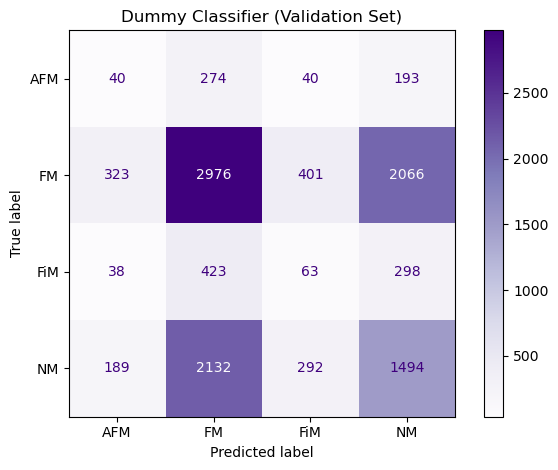

In [ ]:
# Base line model using DummyClassifier with stratified strategy on materials with at least one magnetic element.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Drop rows with missing essential features ===
numerical_features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
                      "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 3. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
X_dummy = np.zeros((len(y), 1))  # dummy feature matrix

# === 4. Print original class distribution ===
print("🔢 Original Class Distribution:")
print(pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x]))

# === 5. 60% train / 20% val / 20% test split ===
X_temp, X_test, y_temp, y_test = train_test_split(X_dummy, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 6. Print split distributions ===
def print_distribution(y, label):
    dist = pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x])
    print(f"📊 {label} Distribution:\n{dist}\n")

print_distribution(y_train, "Train")
print_distribution(y_val, "Validation")
print_distribution(y_test, "Test")

# === 7. Dummy Classifier (Stratified) ===
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

# === 8. Evaluate on validation set ===
y_pred_val = dummy_clf.predict(X_val)
print("📊 Dummy Classifier (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, display_labels=le.classes_, cmap="Purples", values_format="d")
plt.title("Dummy Classifier (Validation Set)")
plt.tight_layout()
plt.show()


🔢 Original Class Distribution:
AFM    0.031031
FM     0.358710
FiM    0.048461
NM     0.561798
Name: proportion, dtype: float64
📊 Train Distribution:
AFM    0.031031
FM     0.358707
FiM    0.048470
NM     0.561792
Name: proportion, dtype: float64

📊 Validation Distribution:
AFM    0.031029
FM     0.358687
FiM    0.048449
NM     0.561835
Name: proportion, dtype: float64

📊 Test Distribution:
AFM    0.031029
FM     0.358743
FiM    0.048449
NM     0.561779
Name: proportion, dtype: float64

📊 Dummy Classifier (Validation Set):
              precision    recall  f1-score   support

         AFM       0.03      0.03      0.03       554
          FM       0.36      0.36      0.36      6404
         FiM       0.05      0.05      0.05       865
          NM       0.56      0.56      0.56     10031

    accuracy                           0.45     17854
   macro avg       0.25      0.25      0.25     17854
weighted avg       0.45      0.45      0.45     17854



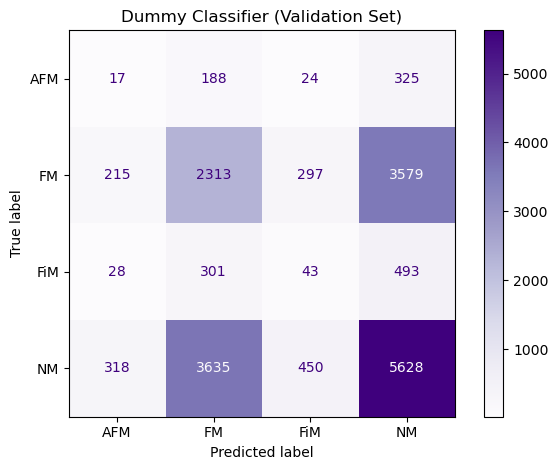

In [13]:
# Base line model using DummyClassifier with stratified strategy on All Data.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("All Data Imported.csv")

# === 2. Drop rows with missing essential features ===
numerical_features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
                      "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 3. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
X_dummy = np.zeros((len(y), 1))  # dummy feature matrix

# === 4. Print original class distribution ===
print("🔢 Original Class Distribution:")
print(pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x]))

# === 5. 60% train / 20% val / 20% test split ===
X_temp, X_test, y_temp, y_test = train_test_split(X_dummy, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 6. Print split distributions ===
def print_distribution(y, label):
    dist = pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x])
    print(f"📊 {label} Distribution:\n{dist}\n")

print_distribution(y_train, "Train")
print_distribution(y_val, "Validation")
print_distribution(y_test, "Test")

# === 7. Dummy Classifier (Stratified) ===
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

# === 8. Evaluate on validation set ===
y_pred_val = dummy_clf.predict(X_val)
print("📊 Dummy Classifier (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, display_labels=le.classes_, cmap="Purples", values_format="d")
plt.title("Dummy Classifier (Validation Set)")
plt.tight_layout()
plt.show()


📊 Class Distribution:

     Count  Percentage
NM   50150       56.18
FM   32021       35.87
FiM   4326        4.85
AFM   2770        3.10


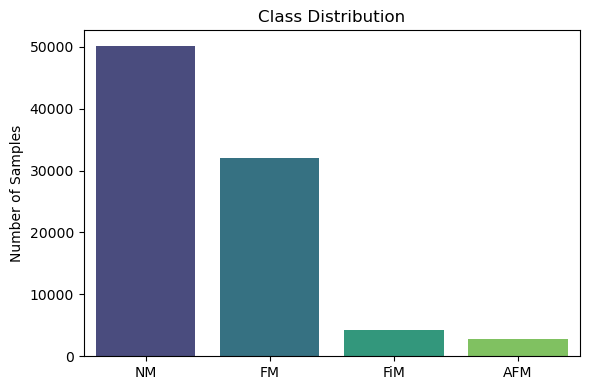

In [14]:
#Clss Distribution For All Data


import seaborn as sns
import matplotlib.pyplot as plt

# === Decode class labels ===
y_named = le.inverse_transform(y)

# === Count class occurrences ===
class_counts = pd.Series(y_named).value_counts()
class_percentages = class_counts / len(y_named) * 100

# === Display as a DataFrame ===
distribution_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages.round(2)
})
print("📊 Class Distribution:\n")
print(distribution_df)

# === Optional: plot bar chart ===
plt.figure(figsize=(6, 4))
sns.barplot(x=distribution_df.index, y=distribution_df['Count'], palette='viridis')
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()


🔢 Original Class Distribution:
AFM       0.048677
FM_FiM    0.585995
NM        0.365328
Name: proportion, dtype: float64
📊 Train Distribution:
AFM       0.048691
FM_FiM    0.585980
NM        0.365329
Name: proportion, dtype: float64

📊 Validation Distribution:
AFM       0.048657
FM_FiM    0.586017
NM        0.365326
Name: proportion, dtype: float64

📊 Test Distribution:
AFM       0.048657
FM_FiM    0.586017
NM        0.365326
Name: proportion, dtype: float64

📊 Dummy Classifier (Validation Set):
              precision    recall  f1-score   support

         AFM       0.05      0.05      0.05       547
      FM_FiM       0.59      0.59      0.59      6588
          NM       0.37      0.37      0.37      4107

    accuracy                           0.48     11242
   macro avg       0.34      0.34      0.34     11242
weighted avg       0.48      0.48      0.48     11242



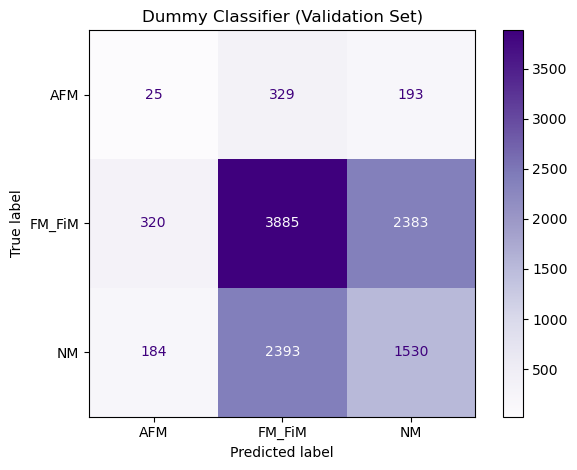

In [ ]:
# Base line model using DummyClassifier with stratified strategy on Materials with at least one magnetic element with FM and FiM

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "FM_FiM", "FiM": "FM_FiM"})

# === 3. Drop rows with missing essential features ===
numerical_features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
                      "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 4. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
X_dummy = np.zeros((len(y), 1))  # dummy feature matrix

# === 5. Print original class distribution ===
print("🔢 Original Class Distribution:")
print(pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x]))

# === 6. 60% train / 20% val / 20% test split ===
X_temp, X_test, y_temp, y_test = train_test_split(X_dummy, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 7. Print split distributions ===
def print_distribution(y, label):
    dist = pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x])
    print(f"📊 {label} Distribution:\n{dist}\n")

print_distribution(y_train, "Train")
print_distribution(y_val, "Validation")
print_distribution(y_test, "Test")

# === 8. Dummy Classifier (Stratified) ===
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

# === 9. Evaluate on validation set ===
y_pred_val = dummy_clf.predict(X_val)
print("📊 Dummy Classifier (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, display_labels=le.classes_, cmap="Purples", values_format="d")
plt.title("Dummy Classifier (Validation Set)")
plt.tight_layout()
plt.show()


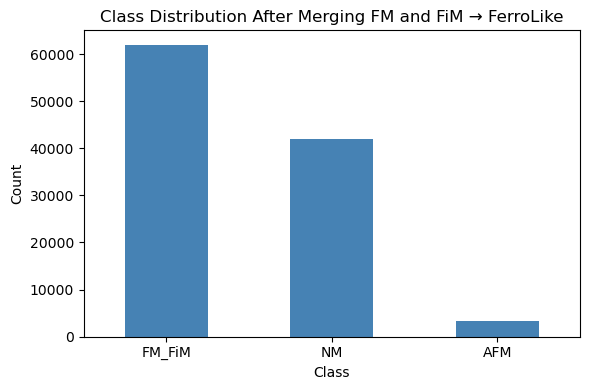

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Load CSV ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "FM_FiM", "FiM": "FM_FiM"})



# === 4. Plot class distribution histogram ===
plt.figure(figsize=(6, 4))
df["ordering"].value_counts().plot(kind="bar", color="steelblue")
plt.title("Class Distribution After Merging FM and FiM → FerroLike")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


🔢 Original Class Distribution:
Magnetic    0.634672
NM          0.365328
Name: proportion, dtype: float64
📊 Train Distribution:
Magnetic    0.634671
NM          0.365329
Name: proportion, dtype: float64

📊 Validation Distribution:
Magnetic    0.634674
NM          0.365326
Name: proportion, dtype: float64

📊 Test Distribution:
Magnetic    0.634674
NM          0.365326
Name: proportion, dtype: float64

📊 Dummy Classifier (Validation Set):
              precision    recall  f1-score   support

    Magnetic       0.63      0.64      0.64      7135
          NM       0.36      0.36      0.36      4107

    accuracy                           0.54     11242
   macro avg       0.50      0.50      0.50     11242
weighted avg       0.54      0.54      0.54     11242



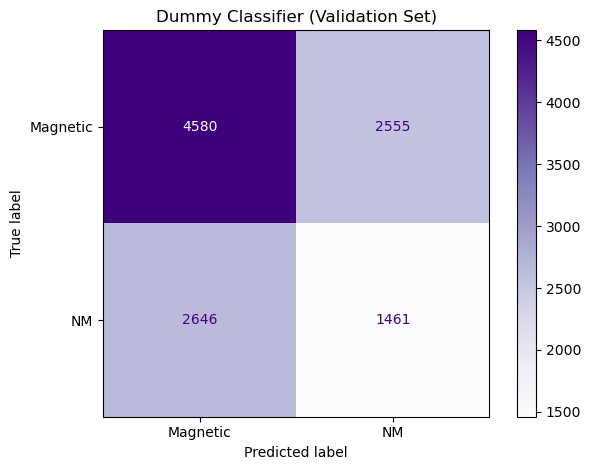

In [22]:
# Base line model using DummyClassifier with stratified strategy on Materials with at least one magnetic element with FM, FiM, and AFM merged
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load CSV ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Merge FM, FiM, and AFM into "Magnetic" ===
df["ordering"] = df["ordering"].replace({"FM": "Magnetic", "FiM": "Magnetic", "AFM": "Magnetic"})

# === 3. Drop rows with missing essential features ===
numerical_features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
                      "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])

# === 4. Encode target ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
X_dummy = np.zeros((len(y), 1))  # dummy feature matrix

# === 5. Print original class distribution ===
print("🔢 Original Class Distribution:")
print(pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x]))

# === 6. 60% train / 20% val / 20% test split ===
X_temp, X_test, y_temp, y_test = train_test_split(X_dummy, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# === 7. Print split distributions ===
def print_distribution(y, label):
    dist = pd.Series(y).value_counts(normalize=True).sort_index().rename(index=lambda x: le.classes_[x])
    print(f"📊 {label} Distribution:\n{dist}\n")

print_distribution(y_train, "Train")
print_distribution(y_val, "Validation")
print_distribution(y_test, "Test")

# === 8. Dummy Classifier (Stratified) ===
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

# === 9. Evaluate on validation set ===
y_pred_val = dummy_clf.predict(X_val)
print("📊 Dummy Classifier (Validation Set):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, display_labels=le.classes_, cmap="Purples", values_format="d")
plt.title("Dummy Classifier (Validation Set)")
plt.tight_layout()
plt.show()


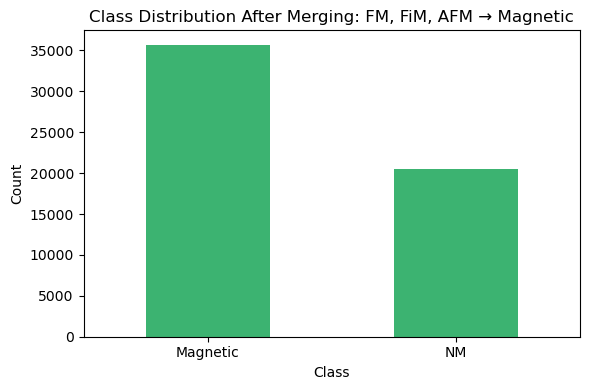

In [23]:
# === Plot class distribution histogram ===
plt.figure(figsize=(6, 4))
df["ordering"].value_counts().plot(kind="bar", color="mediumseagreen")
plt.title("Class Distribution After Merging: FM, FiM, AFM → Magnetic")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
